# PROJETO 2 
### ANÁLISE DE DADOS DE E-COMMERCE

# 1. Compreensão do Dataset

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset para a memória (utilizando pandas) --> data.csv
df = pd.read_csv('data.csv',encoding="ISO-8859-1",)

# 1. Compreensão do Negócio e do Problema 

In [3]:
# Verificando se carregou adequadamente e mostrando as 5 primeiras linhas do dataframe
print(df.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Descrição das Colunas

**InvoiceNo**  - Código identificador da Ordem de Venda  
**StockCode**   - Código do item ou Apenas Localização de Estoque   
**Description** - Descrição do Item   
**Quantity**    - Quantida do item na ordem de venda    
**InvoiceDate** - Data da ordem de compra  
**CustomerID**  - Código identificador do Cliente  
**Country**     - País do cliente  

In [5]:
# Identificando a quantidade de valores nulos
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Resumo das observações prévias
O Dataset possui 8 colunas com dados sobre ordens de compras de um e-commerce.  

Há dados sobre as ordens de compra, cada linha indica o item e a quantidade que foi comprada, trazendo informações de qual cliente, quando e onde ele realizou a compra, o preço unitário de compra de cada item e podendo haver compras de diversos itens dentro de uma mesma Invoice.  

Os dados mais importantes ausentes são de indentificação do cliente, podendo ser considerados em uma análise de compras iniciais, porém para uma análise mais detalhada dos clientes devem ser desconsiderados.

Há também informação faltante das descrição dos itens, porém os códigos dos itens estão todos completos, podemos analisar essas descrições de itens para ver se podemos considerar cada código de produto único da descrição e preenche-los ou se não devemos relaciona-los.

Apesar de mais de um item por Invoice é importante também a verificação de dados duplicados para não sujar a base.

# 2. Limpeza e Preparação dos dados

### 2.1 Verificando duplicidade nos registros

In [6]:
# Quantificando duplicidade nos registros
print(df.duplicated().sum(), "linhas Duplicadas de um total de", len(df), "entradas.")

5268 linhas Duplicadas de um total de 541909 entradas.


In [7]:
# Identificar linhas duplicadas
linhas_dup = df[df.duplicated()]

# Contar e exibir algumas duplicatas
exibir_linhas_dup = linhas_dup.head()

exibir_linhas_dup

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


In [8]:
# Criando nova versão sem as duplicadas
df_limpo = df.drop_duplicates()

# Quantificando duplicidade nos registros
print(df_limpo.duplicated().sum(), "linhas Duplicadas de um total de", len(df), "entradas.")

0 linhas Duplicadas de um total de 541909 entradas.


In [9]:
# Atualizando Dataset sem duplicatas
df=df_limpo

### 2.2 Avaliação da Relação entre as colunas StockCode e Description

In [10]:
# Verificar valores únicos das colunas analisadas
codigos_unicos = df['StockCode'].nunique()
print(f"Códigos unicos: {codigos_unicos}")

descr_unicas = df['Description'].nunique()
print(f"Descrições únicas': {descr_unicas}")

# Analisar Relação entre 'StockCode' & 'Description'
stock_x_description = pd.crosstab(df['StockCode'], df['Description'])

display(stock_x_description.head(10))

Códigos unicos: 4070
Descrições únicas': 4223


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10123C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10124A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10124G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Encontrar códigos com mais de uma descrição
multiplas_descr_por_codigo = stock_x_description[stock_x_description.sum(axis=1) > 1]
quant_multiplas_descr = len(multiplas_descr_por_codigo)
print(f"\nNúmbero de Códigos com multiplas descrições: {quant_multiplas_descr}")


Númbero de Códigos com multiplas descrições: 3786


**INTERPRETAÇÃO:**  
Não há uma relação direta entre os códigos e a descrição dos produtos, linhas sem descrições devem desconsideradas para análises mais aprofundadas sobre os produtos.

### 2.3 Avaliação da Relação entre as colunas Cliente e País

In [13]:
cliente_pais = df.groupby('CustomerID')['Country'].unique()
multiplo_paises_clientes = cliente_pais[cliente_pais.apply(len) > 1]
print(f"Clientes que compram de múltiplos países: {multiplo_paises_clientes}")

Clientes que compram de múltiplos países: CustomerID
12370.0           [Cyprus, Austria]
12394.0          [Belgium, Denmark]
12417.0            [Belgium, Spain]
12422.0    [Australia, Switzerland]
12429.0          [Denmark, Austria]
12431.0        [Australia, Belgium]
12455.0             [Cyprus, Spain]
12457.0       [Switzerland, Cyprus]
Name: Country, dtype: object


In [14]:
# Substituir nomes e deletar paises não especificados
df['Country'] = df['Country'].replace('EIRE', 'Ireland')
df = df[df['Country'] != 'Unspecified']

**INTERPRETAÇÃO:**  
Há Clientes que compram de mais de um país de origem.

### 2.3 Conversão dos tipos de variáveis

In [15]:
# Converter InvoiceDate para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [16]:
# Remover linhas onde CustomerID está ausente
df = df.dropna(subset=["CustomerID"])

# Converter para object
df['CustomerID'] = df['CustomerID'].astype('object')

### 2.4 Criação de Novas Métricas por Cliente

In [17]:
# Criar nova coluna Total Comprado por linha
df["TotalCompra"] = df["Quantity"] * df["UnitPrice"]

In [18]:
# Criar métrica de ticket médio por cliente
ticket_medio = df.groupby("CustomerID")["TotalCompra"].mean().reset_index()
ticket_medio.columns = ["CustomerID", "TicketMedio"]

# Criar métrica de frequência de compra por cliente
frequencia = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
frequencia.columns = ["CustomerID", "FrequenciaCompra"]

# Calcular valor total de compras por cliente
valor_total = df.groupby("CustomerID")["TotalCompra"].sum().reset_index()
valor_total.columns = ["CustomerID", "ValorTotalCompras"]

# Calcular última data de compra por cliente
ultima_compra = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
ultima_compra.columns = ["CustomerID", "UltimaCompra"]

# Calcular dias desde a última compra
data_referencia = df["InvoiceDate"].max()
ultima_compra["DiasDesdeUltimaCompra"] = (data_referencia - ultima_compra["UltimaCompra"]).dt.days

# Unir todas as métricas ao dataset original
df_clientes = df[["CustomerID"]].drop_duplicates()
df_clientes = df_clientes.merge(ticket_medio, on="CustomerID", how="left")
df_clientes = df_clientes.merge(frequencia, on="CustomerID", how="left")
df_clientes = df_clientes.merge(valor_total, on="CustomerID", how="left")
df_clientes = df_clientes.merge(ultima_compra[["CustomerID", "UltimaCompra", "DiasDesdeUltimaCompra"]], on="CustomerID", how="left")

# Exibir as primeiras linhas do dataset final de clientes
df_clientes.head()

,CustomerID,TicketMedio,FrequenciaCompra,ValorTotalCompras,UltimaCompra,DiasDesdeUltimaCompra
0,17850,17.163366,35,5303.48,2011-02-10 14:38:00,301
1,13047,15.709694,18,3079.10,2011-11-08 12:10:00,31
2,12583,28.634821,18,7187.34,2011-12-07 08:07:00,2
3,13748,33.866071,5,948.25,2011-09-05 09:45:00,95
4,15100,105.850000,6,635.10,2011-01-13 17:09:00,329


# 3. Análise Exploratória de Dados (EDA) 

### 3.1  Padrões de compras ao longo do tempo

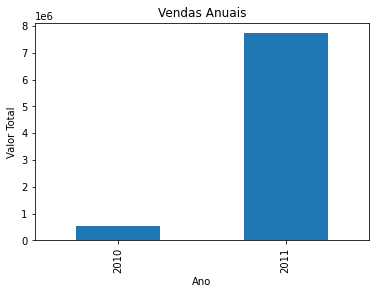

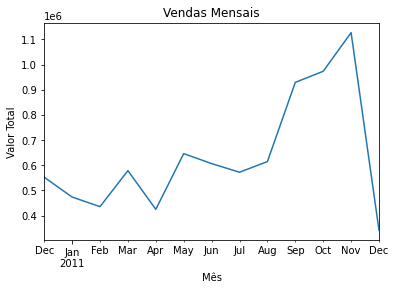

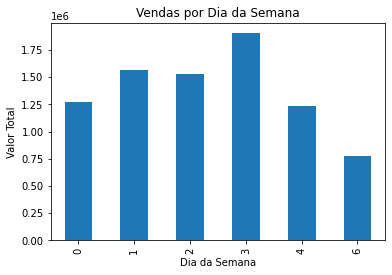

In [19]:
# Agrupar por mês
vendas_ano =  df.groupby(df['InvoiceDate'].dt.year)['TotalCompra'].sum()

# Agrupar por mês
vendas_mes = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalCompra'].sum()

# Agrupar por dia da semana
vendas_diadasemana = df.groupby(df['InvoiceDate'].dt.dayofweek)['TotalCompra'].sum()

# Gráfico de barras das vendas anuais
vendas_ano.plot(kind='bar')
plt.title('Vendas Anuais')
plt.xlabel('Ano')
plt.ylabel('Valor Total')
plt.show()

# Gráfico de linha das vendas mensais
vendas_mes.plot(kind='line')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Valor Total')
plt.show()

# Gráfico de barras das vendas por dia da semana
vendas_diadasemana.plot(kind='bar')
plt.title('Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Valor Total')
plt.show()

In [20]:
ultima_data_invoice = df['InvoiceDate'].max()
print(f"A data da última invoice é: {ultima_data_invoice}")

A data da última invoice é: 2011-12-09 12:50:00


**INTERPRETAÇÃO:**  
Dados entre dez/2010 e dez/2011, o último dado é do começo de dez/2011, desconsiderando este último mês que está incompleto há uma tendência de crescimento de vendas a partir do segundo semestre de 2011.  
É aparente um pico de vendas no 1º mês, que pode ser justificado pelo lançamento/início da plataforma e pico em março e maio que podem indicar que houve alguma ação específica de venda, ou que há um certo pico de compras nesses períodos por pura sazonalidade. 
Não há compras aos Sábados (dia da semana 5).

### 3.2  Padrões dos produtos

In [21]:
# Agrupar por 'Description' e somar as quantidades vendidas
produtos_vendidos = df.groupby('Description')['Quantity'].sum()

# Exibir os produtos mais vendidos
print("Produtos mais vendidos:")
print(produtos_vendidos.sort_values(ascending=False).head(10))

Produtos mais vendidos:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35193
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33362
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24105
Name: Quantity, dtype: int64


In [22]:
from collections import defaultdict

# Filtrar invoices não canceladas (como antes)
df_filtered = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Criar uma lista de transações (invoices) (como antes)
transactions = df_filtered.groupby('InvoiceNo')['Description'].apply(list).values.tolist()

# Dicionário para armazenar a frequência de pares de produtos
product_pairs = defaultdict(int)

# Iterar pelas transações e contar a frequência de pares de produtos
for transaction in transactions:
    for i in range(len(transaction)):
        for j in range(i + 1, len(transaction)):
            product1, product2 = sorted([transaction[i], transaction[j]])  # Ordenar para consistência
            product_pairs[(product1, product2)] += 1

# Criar um DataFrame com os pares de produtos e suas frequências
frequent_pairs = pd.DataFrame(list(product_pairs.items()), columns=['Par Produto', 'Frequencia'])

# Ordenar por frequência em ordem decrescente
frequent_pairs = frequent_pairs.sort_values(by=['Frequencia'], ascending=False)

# Exibir os pares de produtos mais frequentes
print("\nProdutos frequentemente comprados juntos:")
print(frequent_pairs.head(10))


Produtos frequentemente comprados juntos:
                                              Par Produto  Frequencia
11234   (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...         575
31530   (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...         557
113     (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...         549
7137    (LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROS...         547
4017    (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...         545
41090   (LUNCH BAG  BLACK SKULL., LUNCH BAG PINK POLKA...         488
4105    (PAPER CHAIN KIT 50'S CHRISTMAS , PAPER CHAIN ...         476
4015    (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...         476
986776  (GARDENERS KNEELING PAD CUP OF TEA , GARDENERS...         475
374     (WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...         474


**INTERPRETAÇÃO:**  
Produtos mais vendidos indicam produtos com maior demanda que poderiam ter uma maior margem, e também demonstra oportunidade de melhoria do desenvolvimento de vendas dos demais produtos.  
Análise de produtos mais vendidos em combos, para verificar possíveis oportunidades de promoções.

### 3.3 Analisar padrões de cancelamento de pedidos.

In [23]:
# Avaliando a Taca de cancelamento
df['Cancelados'] = df['Quantity'] < 0
taxa_cancelamento = df['Cancelados'].sum() / len(df)
print(f"Taxa de cancelamento: {taxa_cancelamento:.2%}")

Taxa de cancelamento: 2.21%


In [27]:
produtos_cancelados = df[df['Cancelados']].groupby('Description')['TotalCompra'].sum()
print("\nProdutos mais cancelados:")
print(produtos_cancelados.sort_values(ascending=True).head(10))


Produtos mais cancelados:
Description
PAPER CRAFT , LITTLE BIRDIE          -168469.60
Manual                               -112165.39
MEDIUM CERAMIC TOP STORAGE JAR        -77479.64
POSTAGE                               -11093.72
REGENCY CAKESTAND 3 TIER               -9697.05
CRUK Commission                        -7933.43
WHITE HANGING HEART T-LIGHT HOLDER     -6624.30
FAIRY CAKE FLANNEL ASSORTED COLOUR     -6591.42
Discount                               -5696.22
PANTRY CHOPPING BOARD                  -4803.06
Name: TotalCompra, dtype: float64


In [28]:
produtos_cancelados = df[df['Cancelados']].groupby('Description')['Quantity'].sum()
print("\nProdutos mais cancelados:")
print(produtos_cancelados.sort_values(ascending=True).head(10))


Produtos mais cancelados:
Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9367
Manual                                 -3995
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
WHITE HANGING HEART T-LIGHT HOLDER     -2578
GIN + TONIC DIET METAL SIGN            -2030
HERB MARKER BASIL                      -1527
FELTCRAFT DOLL MOLLY                   -1447
TEA TIME PARTY BUNTING                 -1424
Name: Quantity, dtype: int64


In [25]:
clientes_cancelamentos = df[df['Cancelados']].groupby('CustomerID')['InvoiceNo'].nunique()
print("\nClientes com mais cancelamentos:")
print(clientes_cancelamentos.sort_values(ascending=False).head(10))


Clientes com mais cancelamentos:
CustomerID
14911.0    47
17841.0    45
14606.0    35
14527.0    31
15311.0    27
16422.0    24
13089.0    21
12471.0    19
13408.0    19
13534.0    18
Name: InvoiceNo, dtype: int64


**INTERPRETAÇÃO:**  
Conseguimos observar uma relativamente baixa taxa de cancelamento, com a separação dos produtos mais cancelados por preço e por quantidade, sendo foco de antenção para qualidade/expectativa dos cliente, assim como verificar os principais clientes que cancelam compras, indicando possível fraude/má fé.

# 5. Insights e Recomendações

#### Além dos insights já apresentados:

### 5.1 Distribuição de venda por país

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'Ireland'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Sweden'),
  Text(10, 0, 'Japan'),
  Text(11, 0, 'Norway'),
  Text(12, 0, 'Portugal'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'Channel Islands'),
  Text(15, 0, 'Denmark'),
  Text(16, 0, 'Italy'),
  Text(17, 0, 'Cyprus'),
  Text(18, 0, 'Austria'),
  Text(19, 0, 'Singapore'),
  Text(20, 0, 'Poland'),
  Text(21, 0, 'Israel'),
  Text(22, 0, 'Greece'),
  Text(23, 0, 'Iceland'),
  Text(24, 0, 'Canada'),
  Text(25, 0, 'Malta'),
  Text(26, 0, 'United Arab Emirates'),
  Text(27, 0, 'USA'),
  Text(28, 0, 'Lebanon'),
  Text(29, 0, 'Lithuania'),
  Text(30, 0, 'European Community'),


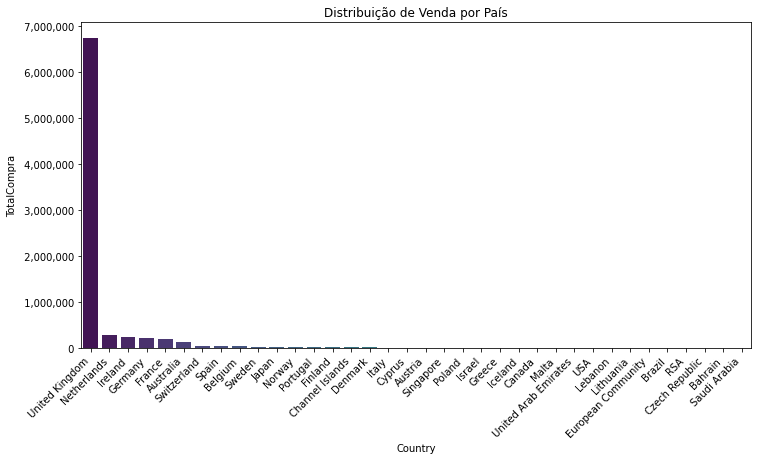

In [29]:
# Agrupar por país e calcular a soma do TotalGasto
total_vendido_pais = df.groupby('Country')['TotalCompra'].sum().reset_index()

# Ordenar por Total Vendido em ordem decrescente
total_vendido_pais = total_vendido_pais.sort_values(
    by=['TotalCompra'], ascending=False
)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar tamanho da figura
plt.title('Distribuição de Venda por País')
sns.barplot(
    x='Country',
    y='TotalCompra',
    data=total_vendido_pais,
    palette='viridis',  # Escolher uma paleta de cores
)


# Formatar valores do eixo y como Float
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f' {x:,.0f}')
)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right', fontsize=10)

**INTERPRETAÇÃO:**  
País com mais venda é pra UK, sendo um mercado para focar investimentos e outros países aparecem como oportunidades para desenvolvimento dos negócios.